<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/main/DM_understanding_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TESTO DEL PROGETTO**

Task 1.1: Data Understanding

Explore the dataset with the analytical tools studied and write a concise “data understanding”
report assessing data quality, the distribution of the variables and the pairwise correlations.
Subtasks of DU:

1. Data semantics for each feature that is not described above and the new one defined
by the team
2. Distribution of the variables and statistics
3. Assessing data quality (missing values, outliers, duplicated records, errors)
4. Variables transformations
5. Pairwise correlations and eventual elimination of redundant variables


Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for
describing the user and his/her behavior derived from the information collected from the
tweets.
Examples of indicators to be computed are:
1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user


# Import libraries and downloading the data

In [ ]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import pandas as pd
from pandas import DataFrame

import numpy as np

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math
import calendar
import calmap
import os

import os.path
from os import path

In [ ]:
# download data from google drive

if not path.exists('users.csv'):
  users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
  tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

  !gdown $users_fileid
  !gdown $tweets_fileid

Downloading...
From: https://drive.google.com/uc?id=16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR
To: /content/users.csv
100% 641k/641k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe
To: /content/tweets.csv
100% 1.86G/1.86G [00:14<00:00, 127MB/s]


In [ ]:
# max_rows is used to load a portion of the dataset

max_rows = 0
 
users_df = pd.read_csv("./users.csv") 

if max_rows != 0:
  tweets_df = pd.read_csv("./tweets.csv", nrows=max_rows)
else:
  tweets_df = pd.read_csv("./tweets.csv")


# **Data Understanding**

---



## Data Semantics

From the project specifications we have:

USERS CSV

1. User Id: an incremental identifier for the user
2. Statues Count: the count of the tweets made by the user at the moment of data
crawling (it is involving only the tweets)
3. Lang: the user’s language selected, there are listed also slangs derived from the country
4. Created at: the timestamp in which the profile was created, many dates are wrong
5. Label: a binary variable that indicates if a user is a bot or a genuine user

TWEETS CSV

1. ID: an incremental identifier for the tweet, reply or comment
2. User Id: a unique identifier for the user who wrote the tweet
3. Retweet count: number of retweets for the tweet in analysis
4. Reply count: number of reply for the tweet in analysis
5. Favorite count: number of likes received 
6. Num hashtags: number of hashtags used in the tweet
7. Num urls: number of urls in the tweet
8. Num mentions: number of mentions in the tweet
9. Created at: when the tweet was created, many are wrong
10. Text: the text of the tweet

#### Tweet.csv informations

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


In [ ]:
tweets_df.head(2)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."


#### User.csv informations

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [ ]:
users_df.head(2)

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0


## Assessing data quality

**Checking if there are any missing values and count them**

In [ ]:
def nan_unique_count(df: DataFrame):
  print('| {:>15} | {:>15}| {:>15} |'.format(*["column", "unique values", "NaN" ]))
  print('------------------------------------------------------')
  for col in df.columns:
    print('| {:>15} | {:>15}| {:>15} |'.format(*[col, len(df[col].unique()), df[col].isna().sum() ]))

In [ ]:
nan_unique_count(tweets_df)

|          column |   unique values|             NaN |
------------------------------------------------------
|              id |        11672136|               2 |
|         user_id |          222286|          217283 |
|   retweet_count |          229168|          437134 |
|     reply_count |          158620|          647878 |
|  favorite_count |          158764|          647542 |
|    num_hashtags |          104780|         1057524 |
|        num_urls |          157146|          648623 |
|    num_mentions |          131539|          854165 |
|      created_at |         8127084|               0 |
|            text |         6778479|          537721 |


In [ ]:
nan_unique_count(users_df)

|          column |   unique values|             NaN |
------------------------------------------------------
|              id |           11508|               0 |
|            name |           11361|               1 |
|            lang |              26|               0 |
|             bot |               2|               0 |
|      created_at |           11423|               0 |
|  statuses_count |            3837|             399 |


As shown above there are some null values inside the two dataframes. In addition, the info method of pandas gives us information about the type of attributes in the dataframe. As you can see all the features in the tweets dataframe are of type "object" this means that non-numeric values are present in attributes that should be numbers such as id, user_id and so on. The data is therefore to be cleaned and properly transformed to the right type.

**Anomalies on numeric fields**

In [ ]:
# to check if non-numeric values are present in the dataset  
# we throw an exception when we try to convert the feature to the correct type.

tweets_cols = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

user_cols = ["id", "statuses_count"]

# checking non-numeric values inside tweets df
for col in tweets_cols:
    try:
        pd.to_numeric(tweets_df[col], errors='raise')
    except Exception as e:
      print(f"column: {col} error: {e}")

# checking non-numeric values inside users df
for col in user_cols:
    try:
        pd.to_numeric(users_df[col], errors='raise')
    except Exception as e:
      print(f"column: {col} error: {e}")

column: id error: Unable to parse string "iylbzyeiw" at position 32
column: user_id error: Unable to parse string "nviem1q" at position 84
column: retweet_count error: Unable to parse string "04fzba6h4f" at position 75
column: reply_count error: Unable to parse string "0ngi" at position 105
column: favorite_count error: Unable to parse string "ai6" at position 42
column: num_hashtags error: Unable to parse string "2wtmdqfavz" at position 49
column: num_urls error: Unable to parse string "626z3" at position 273
column: num_mentions error: Unable to parse string "qdrybz8m1f" at position 202


In [ ]:
# count non-numeric values on tweets dataframe

for col in tweets_cols:
  mask = pd.to_numeric(tweets_df[col], errors='coerce').isna()
  a = mask.sum()

  print(f"column {col} has {a} non-numeric values")

del mask

column id has 433862 non-numeric values
column user_id has 433895 non-numeric values
column retweet_count has 625456 non-numeric values
column reply_count has 809504 non-numeric values
column favorite_count has 808097 non-numeric values
column num_hashtags has 1163677 non-numeric values
column num_urls has 808953 non-numeric values
column num_mentions has 987990 non-numeric values


**Anomalies on datetime**

In [ ]:
# checking correct datetime in tweets df and user df

try:
  pd.to_datetime(tweets_df["created_at"], errors='raise')
except Exception as e:
  print(e)

try:
  pd.to_datetime(users_df["created_at"], errors='raise')
except Exception as e:
  print(e)

no error in datetime format has been found

**Anomalies on languages**

In [ ]:
print(users_df["lang"].unique())

['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']


We can immediately notice erroneous values such as "Select Language..." or the repetition of "zh-tw/zh-TW". These values will be cleaned in the data cleaning section.

**Anomalies on user id**

In [ ]:
# check if there are duplicated ids on users dataframe
users_df[users_df['id'].duplicated() & users_df['id'].notnull()]["id"]

Series([], Name: id, dtype: int64)

No duplicated ids found

**Anomalies on bot label**

In [ ]:
# we check if there are values greater then 1 or less then 0
print((users_df['bot'] > 1).any())
print((users_df['bot'] < 0).any())

False
False


## Assigning correct type to attribute

In [ ]:
# convert tweets_df columns from object to numeric. 
# If a value can't be converted to integer a NaN is inserted
# The NaN will be replaced later

columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=pd.to_numeric(tweets_df[col], errors='coerce', downcast='integer')

tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"], errors='coerce', yearfirst=True)

# assign datetime in user_df

users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [ ]:
# convert name of users_df to string
users_df['name'] = users_df['name'].astype('string')

# convert text of tweets_df to string
tweets_df['text'] = tweets_df['text'].astype('string')

Check dataframes

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  int64         
 1   name            11507 non-null  string        
 2   lang            11508 non-null  object        
 3   bot             11508 non-null  int64         
 4   created_at      11508 non-null  datetime64[ns]
 5   statuses_count  11109 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), string(1)
memory usage: 539.6+ KB


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), float64(8), string(1)
memory usage: 1.0 GB


In [ ]:
users_df.describe()

,id,bot,statuses_count
count,1.150800e+04,11508.000000,11109.000000
mean,1.274517e+09,0.531456,5883.312359
std,9.354135e+08,0.499031,19073.007305
min,6.780330e+05,0.000000,0.000000
25%,4.663594e+08,0.000000,41.000000
50%,1.128643e+09,1.000000,68.000000
75%,2.357148e+09,1.000000,2916.000000
max,3.164942e+09,1.000000,399555.000000


In [ ]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.323083e+07,1.323080e+07,13039240.0,12855192.0,1.285660e+07,1.250102e+07,1.285574e+07,1.267671e+07
mean,inf,2.267436e+289,inf,inf,5.444675e+204,5.599544e+146,7.778625e+202,4.733091e+90
std,NaN,inf,NaN,NaN,inf,1.979818e+150,inf,1.685187e+94
min,3.460000e+02,0.000000e+00,0.0,0.0,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.594485e+17,2.328048e+08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.231170e+17,4.680803e+08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.767656e+17,1.228015e+09,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,inf,3.000000e+296,inf,inf,7.000000e+211,7.000000e+153,1.000000e+210,6.000000e+97


Using pandas' describe method, we can see simple statistics on dataframes. As can be seen in the tweets dataset, there are very large values such as inf and negative values. In the section "visualising data distributions" we will provide more statistics.

## Visualizing data distributions


In this section we will show the distribution of the data by displaying different plots for various features in the dataset.

In [ ]:
color=['#12a0d7']

### Tweets dataset

Substitute inf values

In [ ]:
# we substitute inf values with NaN  in order to compute some plots and later we compute the mean
tweets_df.replace([np.inf, -np.inf], np.nan, inplace=True)

**Data distribution of numerical fields**

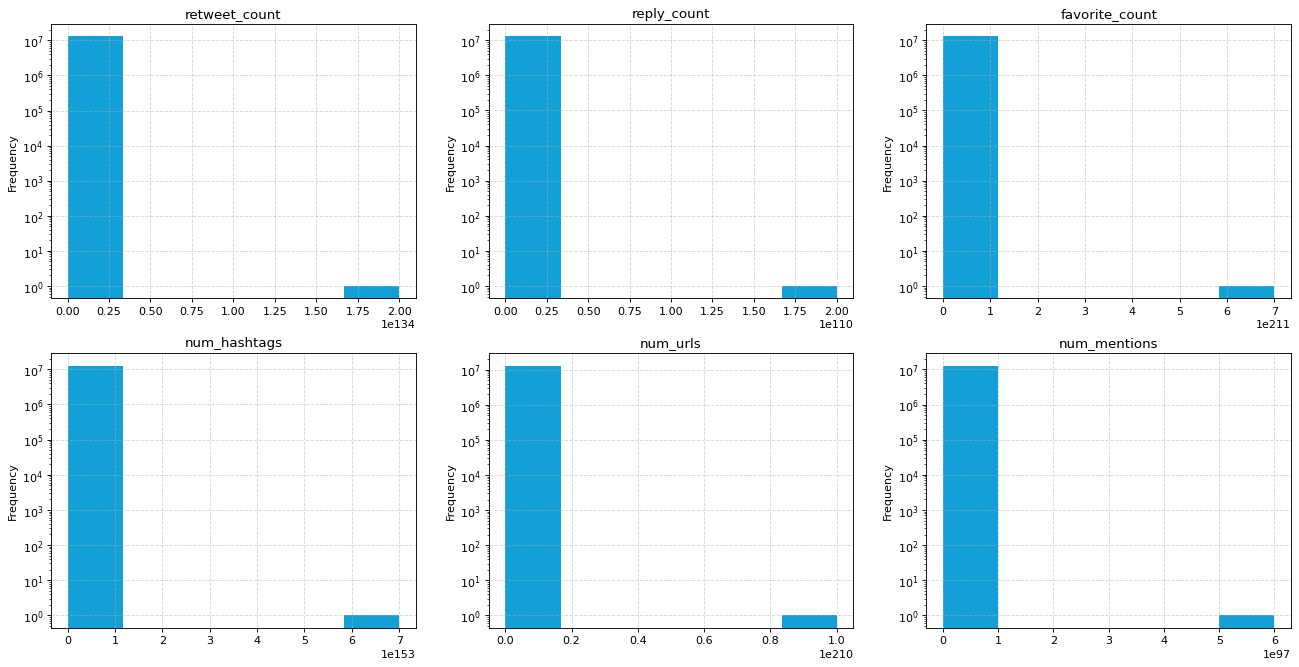

In [ ]:
def multiple_histograms(df: DataFrame, columns):
  fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, dpi=80)
  idx_col = 0

  for i in range(2):
    for j in range(3):

      col = columns[idx_col]
      idx_col +=1
      
      ax = tweets_df[col].plot.hist(bins=6, logy=True,
                                    align='mid',title=col,
                                    grid=True,figsize=(20,10),
                                    ax = axs[i, j],color=color)

      ax.grid(axis='both', alpha=0.5, linestyle='--')
   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_histograms(tweets_df, columns=columns)

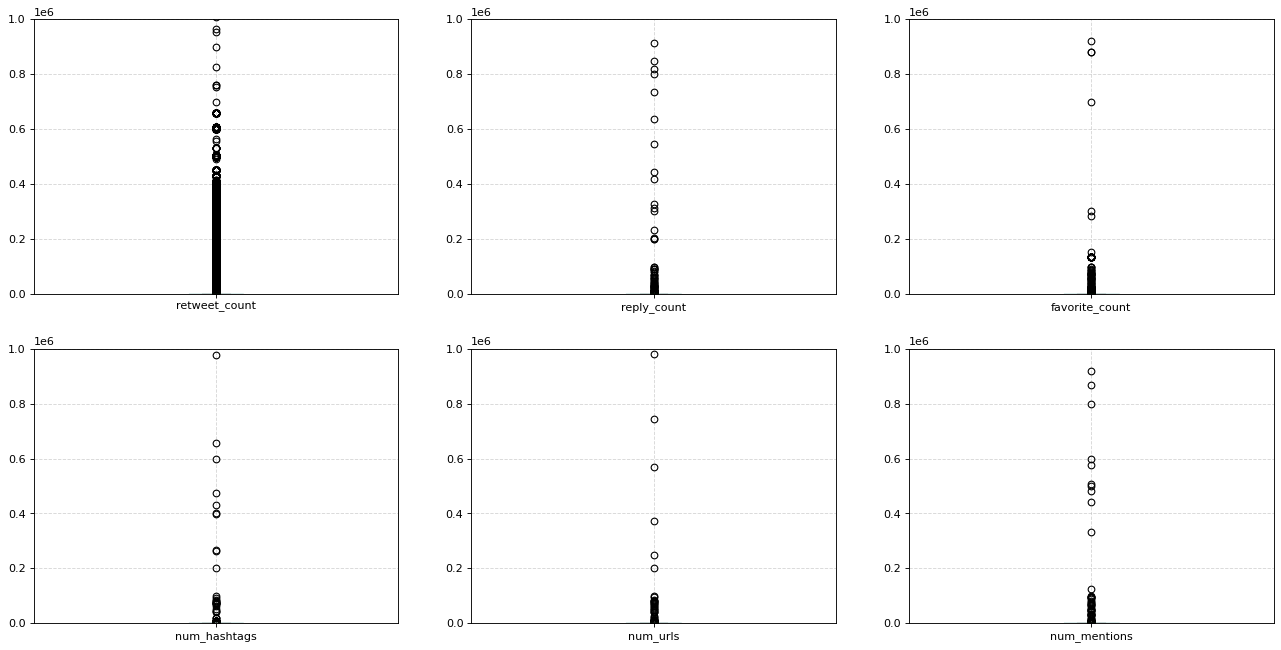

In [ ]:
def multiple_boxplots(df: DataFrame, columns):
  fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, dpi=80)
  fig.set_size_inches(20, 10)
  idx_col = 0

  for i in range(2):
    for j in range(3):

      col = columns[idx_col]
      idx_col +=1

      ax = tweets_df.boxplot(column=[col],
                            grid=True, ax = axs[i, j],)
      ax.set_ylim(-10, 1000000)


      ax.grid(axis='both', alpha=0.5, linestyle='--')
   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_boxplots(tweets_df, columns=columns)

As we can see from the boxplots above there are many values above 75% of the data that are very high. There are very dense areas and not so dense areas. These very high values are considered outliers and will be dealt with in the data preparation phase

The distribution of values has been made in this semplicistic view to avoid outlier issues

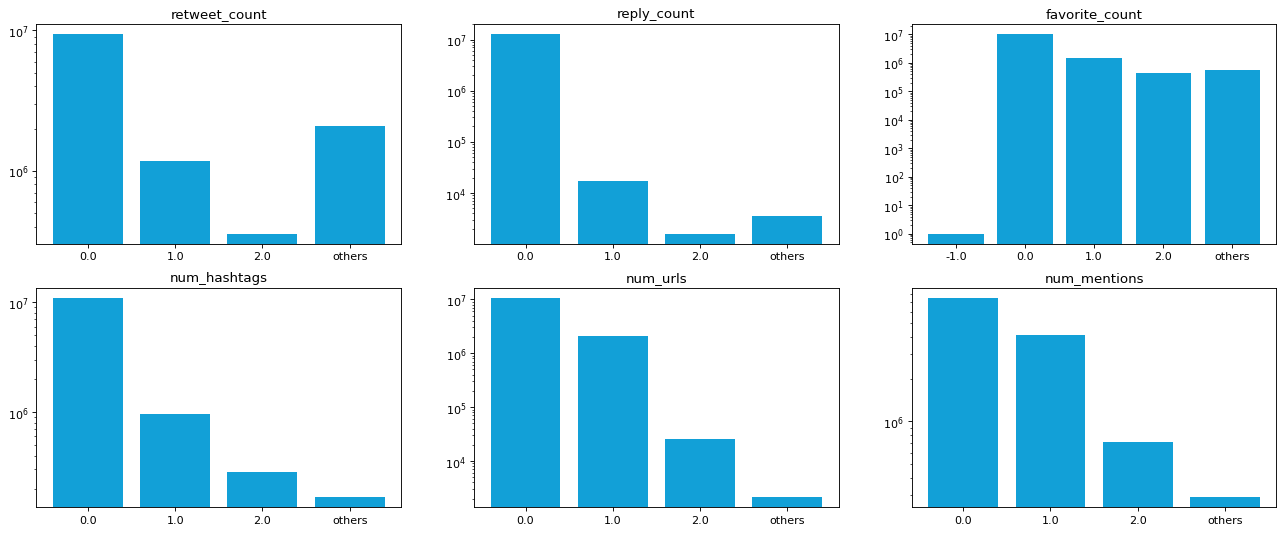

In [ ]:
def multiple_distributions_plot(df: DataFrame, columns):
  fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 8), dpi=80)
  
  idx_col = 0

  for i in range(2):
    for j in range(3):
      
      col = columns[idx_col]
      idx_col +=1

      others = 0
      theMap = {}

      #iterare su tutte le righe impuega un casino, penso si possa fare con dei metodi di pandas
      for val, cnt in df[col].value_counts().iteritems():
          if(val>2):
              others += cnt
          else:
              theMap[val] = cnt

      theMap = dict(sorted(theMap.items()))
      theMap["others"] = others


      axs[i, j].bar(range(len(theMap)), list(theMap.values()), color=['#12a0d7'])
      axs[i, j].set_yscale('log')

      x = np.arange(len(theMap))
      axs[i, j].set_xticks(x)
      axs[i, j].set_xticklabels(list(theMap.keys()))  
      axs[i, j].set_title(col)

columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_distributions_plot(tweets_df, columns=columns)

**Distribution of created_at**

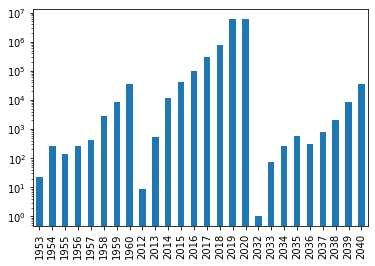

In [ ]:
years = tweets_df['created_at'].dt.year
years.value_counts().sort_index().plot(kind="bar", logy=True)

As we can see from the plot, there are multiple non sense dates of tweets since there are dates that correspond to tweets when twitter had not yet been created and dates in the future.

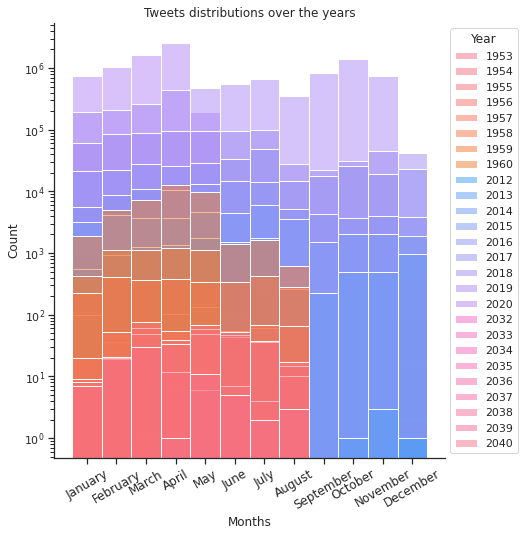

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=tweets_df['created_at'].dt.month, hue=tweets_df['created_at'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
).set(title="Tweets distributions over the years")

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

Here we can see all the years tweets distribution over same months

In [ ]:
crawling_date = pd.to_datetime("today")     # we set today since there are no tweets later than 2020 with meaningful
twitter_birth = pd.to_datetime("2006-03-21")

wrongDate_mask = ((tweets_df['created_at'] > crawling_date) or (tweets_df['created_at'] < twitter_birth))
  
print("Number of tweets with a not coherent date: ", len(tweets_df[wrongDate_mask]))

del wrongDate_mask

ValueError: ignored

**Distribution of lenght of tweets**


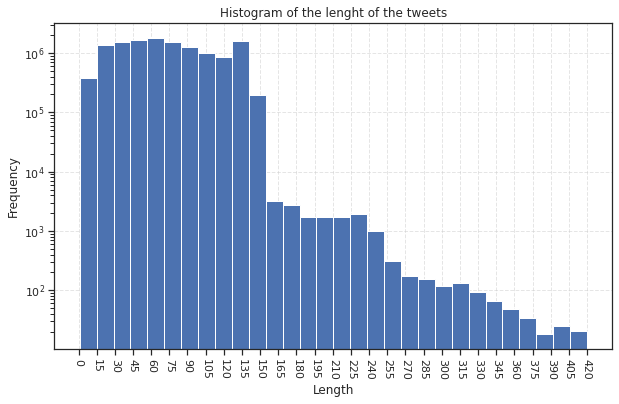

In [ ]:
ax = tweets_df['text'].str.len().plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of the lenght of the tweets",
                                           figsize=(10,6), grid=True)
ax.set_xlabel("Length")

ax.grid(axis='both', alpha=0.5, linestyle='--')
xticks = np.arange(0, 430, 15)
ax.set_xticks(xticks)
ax.tick_params(axis='x', labelrotation=-90)

There are severeal tweets that are exceeding the ceiling of maiximum characters permitted.

### Users dataset

**Distribution of languages**

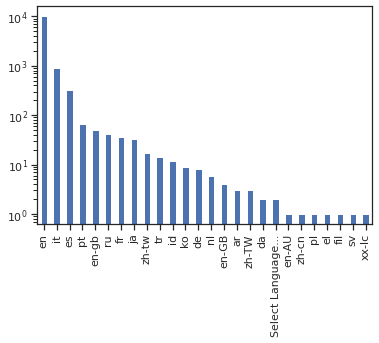

In [ ]:
users_df['lang'].value_counts().plot(kind='bar', logy=True)

**Distribution of created_at**

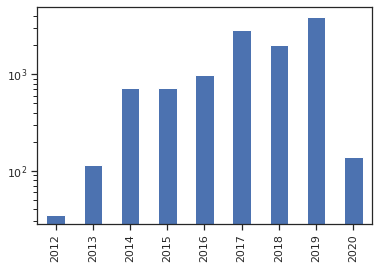

In [ ]:
users_df['created_at'].dt.year.value_counts().sort_index().plot(kind='bar', logy=True)

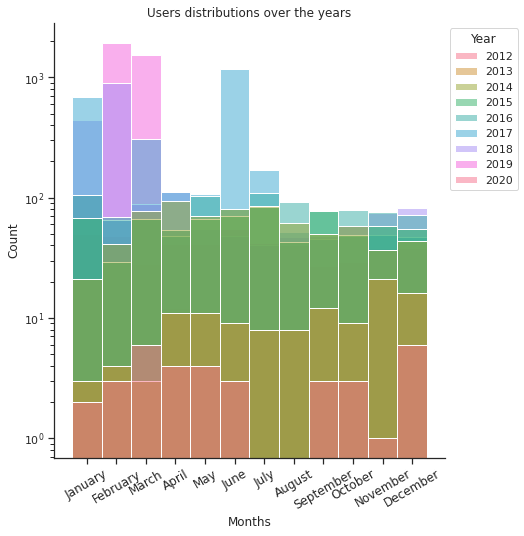

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)


# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=users_df['created_at'].dt.month, hue=users_df['created_at'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
).set(title="Users distributions over the years")

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

**Distribution of statuses count**

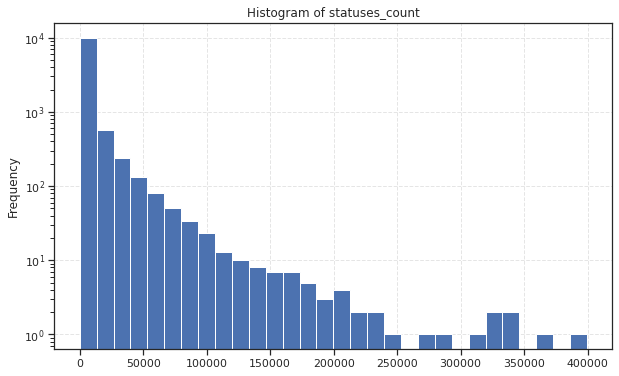

In [ ]:
ax = users_df['statuses_count'].plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of statuses_count",
                                           figsize=(10,6), grid=True)


ax.grid(axis='both', alpha=0.5, linestyle='--')

del ax

## Visualizing data distributions by differentiating bots and non-bots.


### Language bot vs non bot

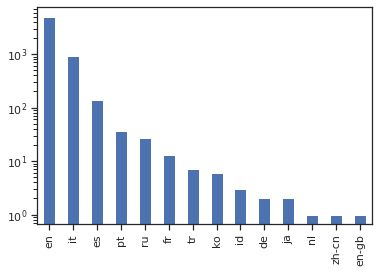

In [ ]:
users_df[users_df.bot == 1]['lang'].value_counts().plot(kind='bar', logy=True)

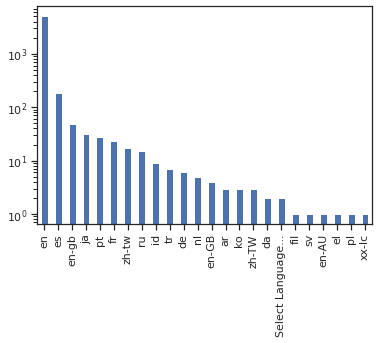

In [ ]:
users_df[users_df.bot == 0]['lang'].value_counts().plot(kind='bar', logy=True)

### Percentage of the number of user: Bot vs No-Bot

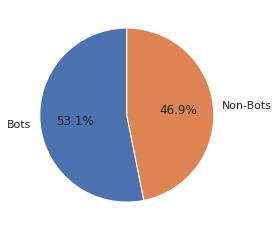

In [ ]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]
labels = 'Bots', 'Non-Bots'
sizes = [len(bots), len(non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### Percentage of the number of tweet :  Bot vs No-Bot

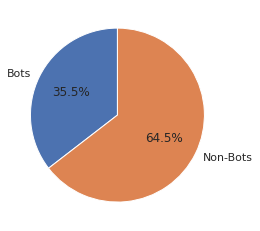

In [ ]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]

bots_ids = bots['id'].to_list()
tweets_of_bots = tweets_df[tweets_df['user_id'].isin(bots_ids)]

non_bots_ids = non_bots['id'].to_list()
tweets_of_non_bots = tweets_df[tweets_df['user_id'].isin(non_bots_ids)]

labels = 'Bots', 'Non-Bots'
sizes = [len(tweets_of_bots), len(tweets_of_non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### How long are the tweets written by the bots & non-bots?

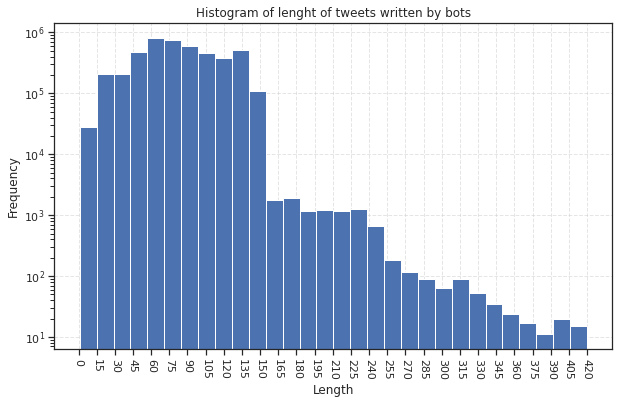

In [ ]:
bot_mask = users_df['bot'] == 1
tweets_by_bot = tweets_df[tweets_df['user_id'].isin(users_df[bot_mask]['id'])]
ax = tweets_by_bot['text'].str.len().plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of lenght of tweets written by bots",
                                           figsize=(10,6), grid=True)
ax.set_xlabel("Length")

ax.grid(axis='both', alpha=0.5, linestyle='--')
xticks = np.arange(0, 430, 15)
ax.set_xticks(xticks)
ax.tick_params(axis='x', labelrotation=-90)

del bot_mask
del tweets_by_bot
del ax

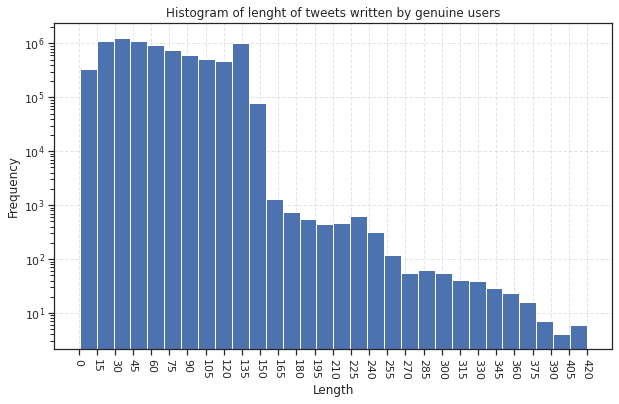

In [ ]:
bot_mask = users_df['bot'] == 0
tweets_by_bot = tweets_df[tweets_df['user_id'].isin(users_df[bot_mask]['id'])]
ax = tweets_by_bot['text'].str.len().plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of lenght of tweets written by genuine users",
                                           figsize=(10,6), grid=True)
ax.set_xlabel("Length")

ax.grid(axis='both', alpha=0.5, linestyle='--')
xticks = np.arange(0, 430, 15)
ax.set_xticks(xticks)
ax.tick_params(axis='x', labelrotation=-90)

del bot_mask
del tweets_by_bot
del ax

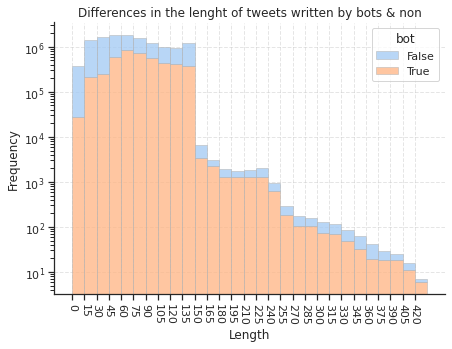

In [ ]:
bot_mask = users_df['bot'] == 1
tweets_by_bot = tweets_df
tweets_by_bot['bot'] = tweets_df['user_id'].isin(users_df[bot_mask]['id'])

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    tweets_by_bot,
    x=tweets_by_bot['text'].str.len(), hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
    binwidth=15,
    binrange=[0, 430],
).set(title='Differences in the lenght of tweets written by bots & non')
ax.set_ylabel("Frequency")
ax.set_xlabel("Length")
xticks = np.arange(0, 430, 15)
ax.set_xticks(xticks)
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.tick_params(axis='x', labelrotation=-90)
plt.show()

del f, ax

### When were the bots created (years)?

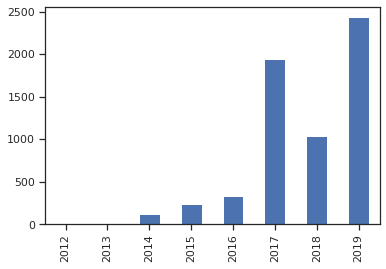

In [ ]:
users_df.loc[users_df["bot"] == 1]['created_at'].dt.year.value_counts().sort_index().plot(kind="bar")

### Percentage of NaN on statuses_count : Bot VS Non-Bot

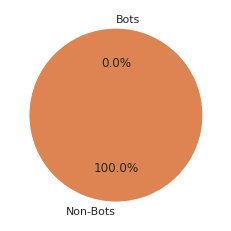

In [ ]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]

statuses_count_bot = bots['statuses_count'].isnull().sum()
statuses_count_non_bot = non_bots['statuses_count'].isnull().sum()

labels = 'Bots', 'Non-Bots'
sizes = [statuses_count_bot, statuses_count_non_bot]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### Describing bot vs non bot *favorite_count*

In [ ]:
bots = users_df[users_df['bot'] == 1]
bots_id = bots['id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
print("Bot's favorite count")
bots_tweets_df["favorite_count"].describe()

Bot's favorite count


count    4.447128e+06
mean     1.708968e+93
std      3.603909e+96
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.600000e+99
Name: favorite_count, dtype: float64

In [ ]:
non_bots = users_df[users_df['bot'] == 0]
non_bots_id = non_bots['id'].to_list()
non_bots_tweets_df = tweets_df[tweets_df['user_id'].isin(non_bots_id)]
print("Non-Bot's favorite count")
non_bots_tweets_df["favorite_count"].describe()

Non-Bot's favorite count


count     8.129638e+06
mean     8.610469e+204
std                inf
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      7.000000e+211
Name: favorite_count, dtype: float64

### Calendar heatmap of tweets wrote by bots

(<Figure size 2520x1440 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cee8ae6d0>,
       dtype=object))

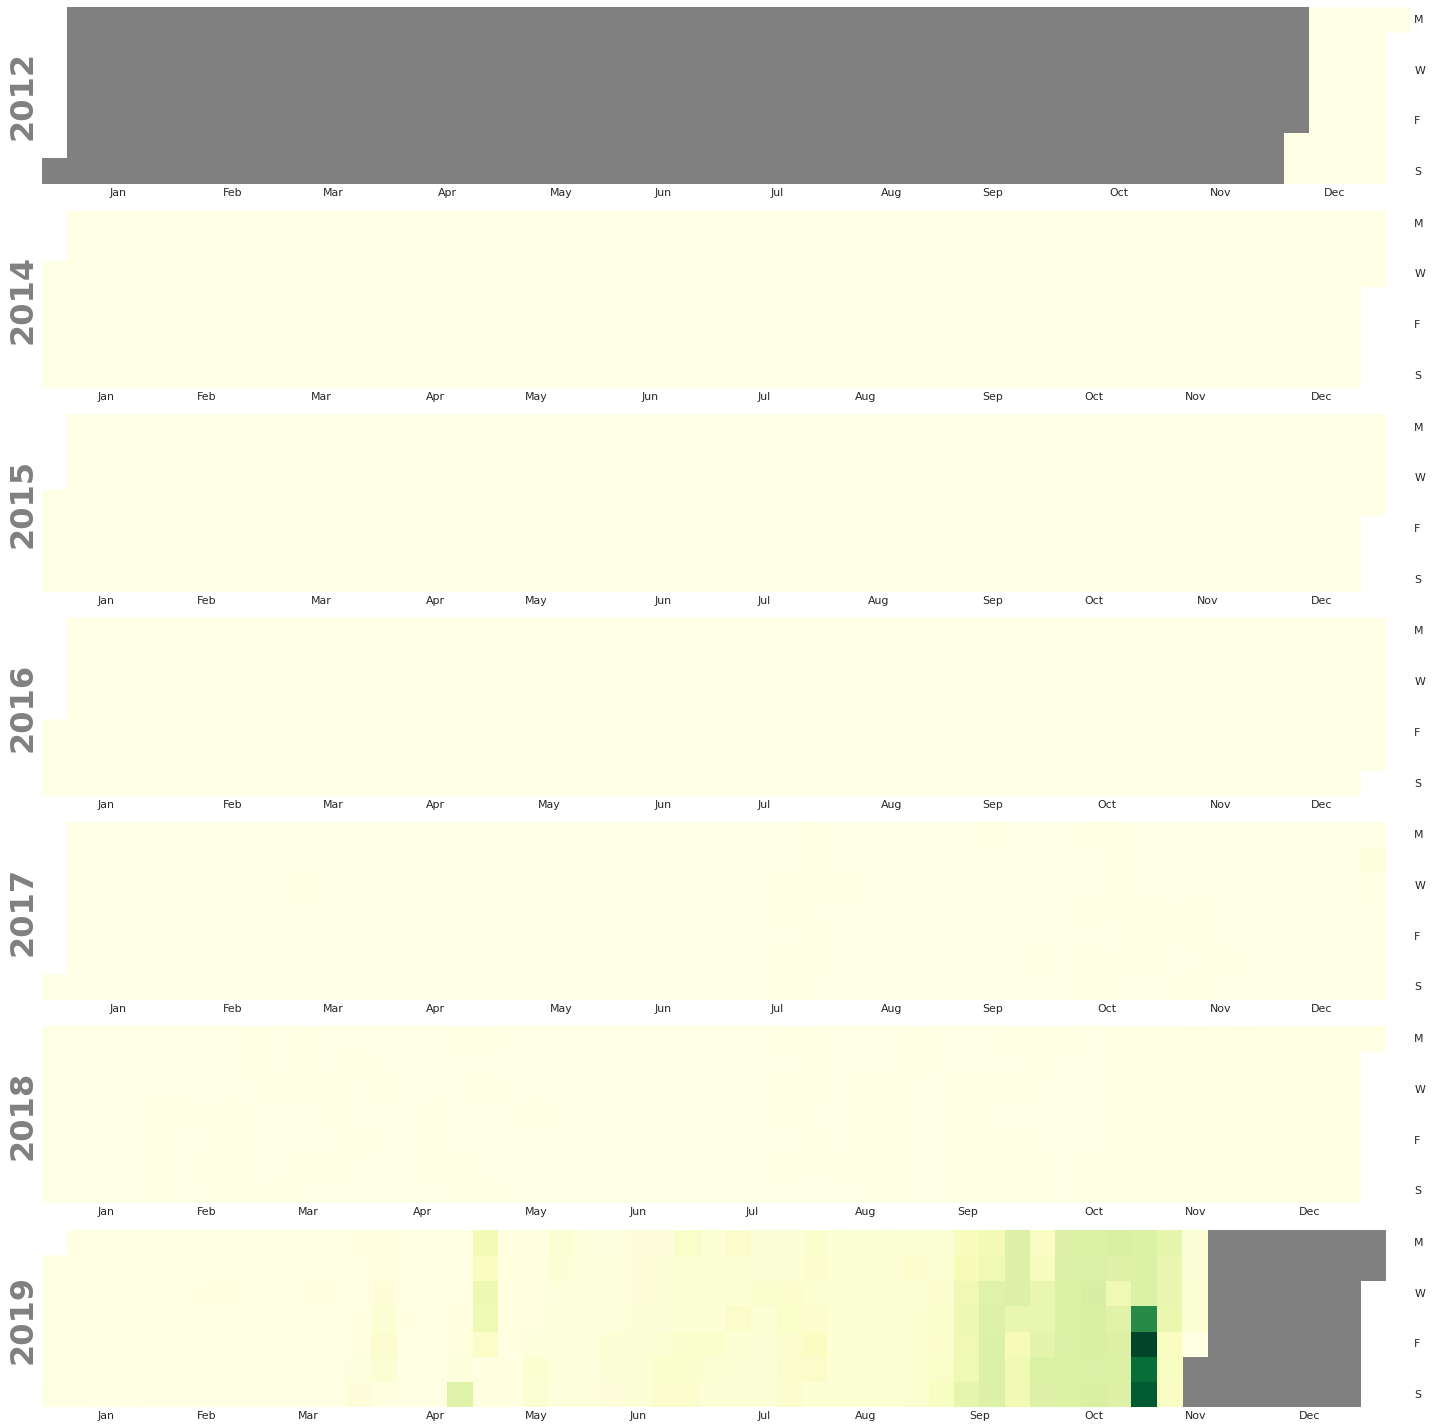

In [ ]:
bots = users_df[users_df['bot'] == 1]
bots_id = bots['id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=0,
                    fig_kws=dict(figsize=(35, 20)))

### Calendar heatmap of tweets wrote by non-bots


(<Figure size 2880x6480 with 26 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf1dfdb90>,
       dtype=object))

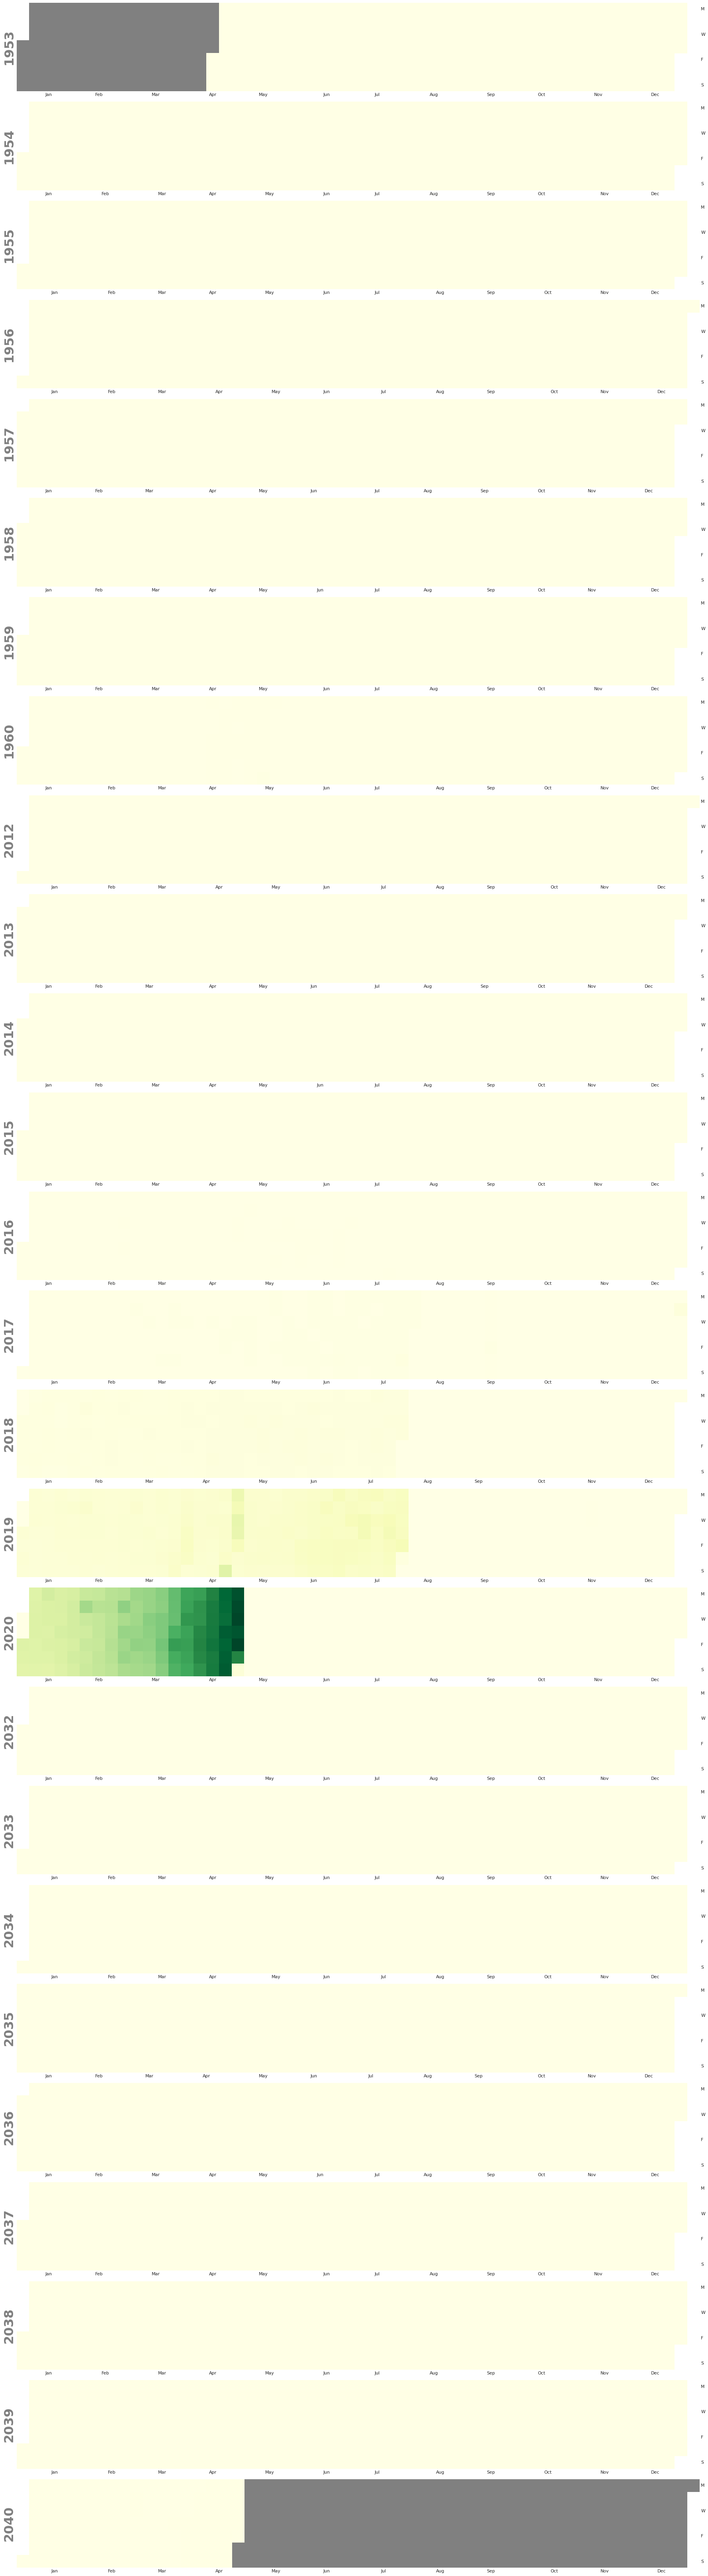

In [ ]:
bots = users_df[users_df['bot'] == 0]
bots_id = bots['id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=0,
                    fig_kws=dict(figsize=(40, 90)))

### Calendar heatmap of creation of bots


(<Figure size 2520x1440 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf0509b90>,
       dtype=object))

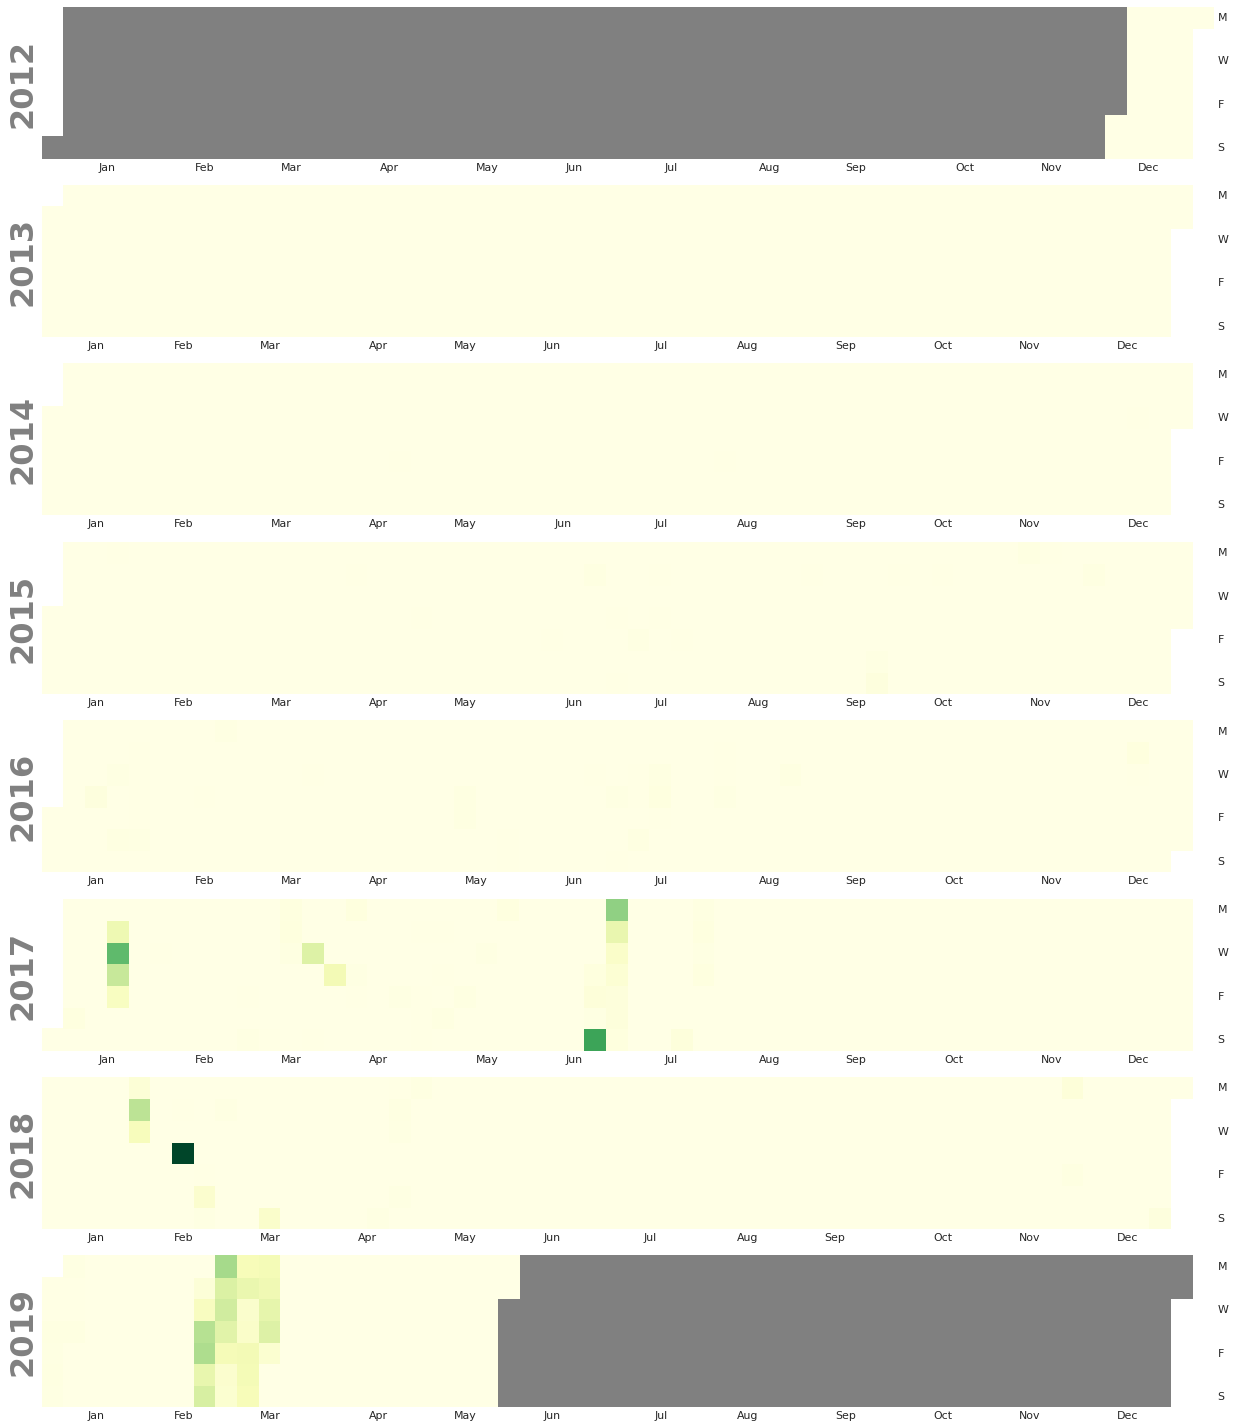

In [ ]:
bots = users_df[users_df['bot'] == 1]
events = bots['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=0,
                    fig_kws=dict(figsize=(35, 20)))

### Calendar heatmap of creation of non-bots


(<Figure size 2520x1440 with 9 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf15ffc10>,
       dtype=object))

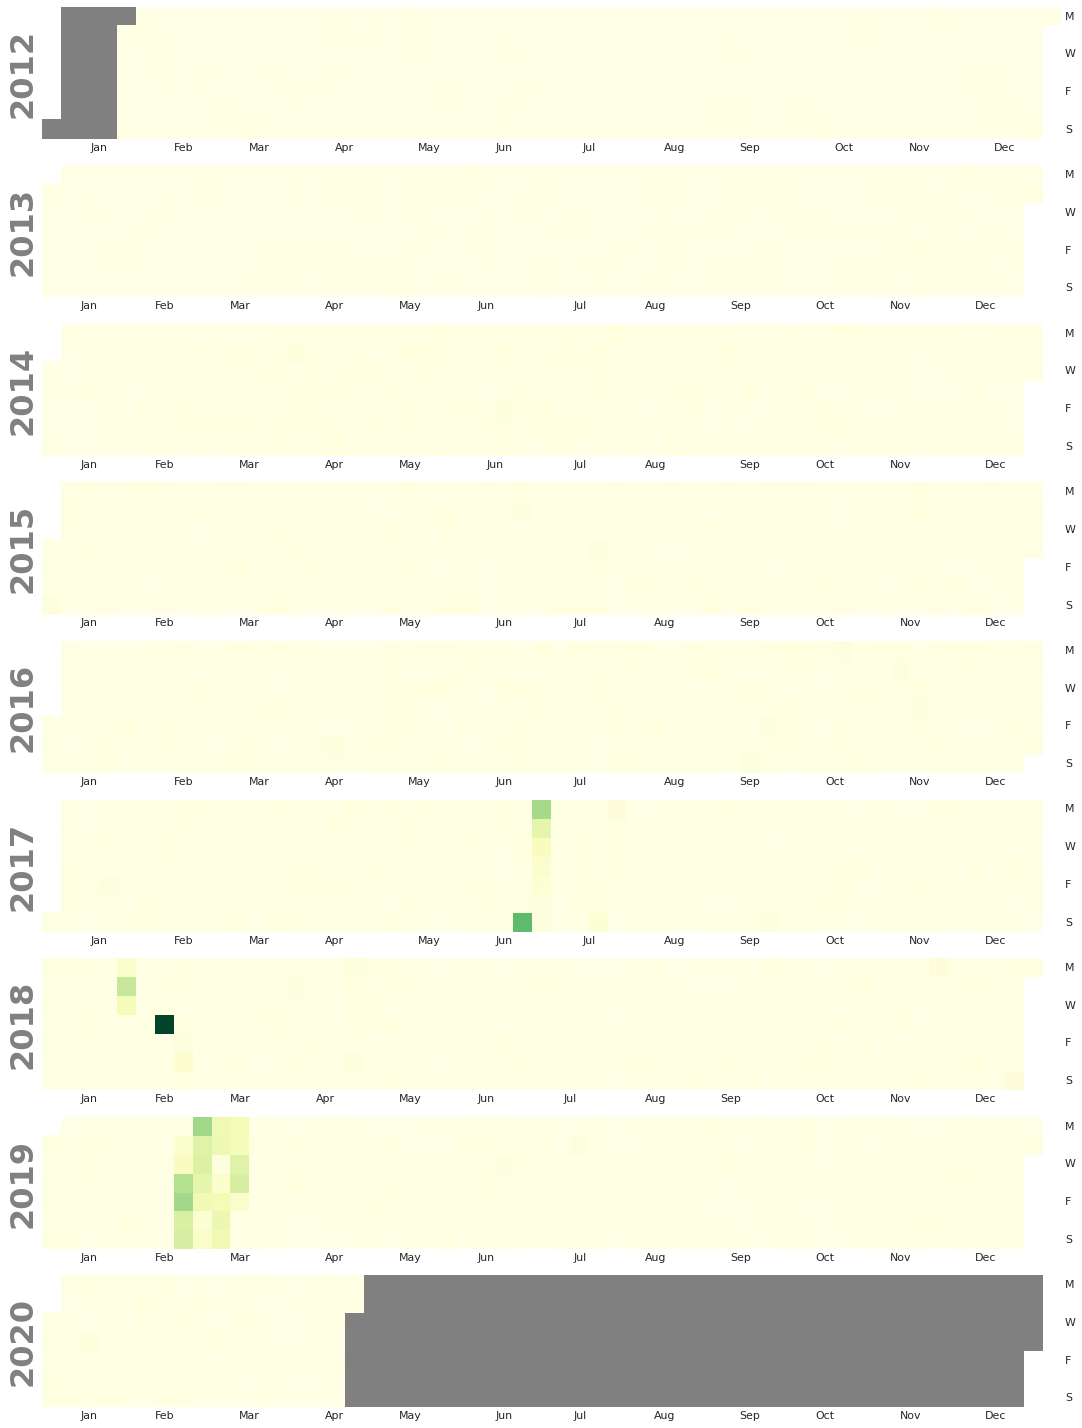

In [ ]:
non_bots = users_df[users_df['bot'] == 0]
events = non_bots['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=0,
                    fig_kws=dict(figsize=(35, 20)))